# Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('flight_data.csv')

# Exploring the data

In [3]:
data.head()

,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [4]:
data.info()  # shows the different data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      35387 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    35208 non-null  object 
 5   stops        37681 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     36987 non-null  float64
 10  days_left    35562 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [5]:
np.round(data.describe(),3)  # gives statistical summary for numerical features

,id,duration,days_left,price
count,40000.00,36987.000,35562.000,40000.000
mean,19999.50,12.004,26.198,20801.490
std,11547.15,7.108,13.469,22729.148
min,0.00,0.830,1.000,1105.000
25%,9999.75,6.670,15.000,4687.000
50%,19999.50,11.080,26.000,7353.000
75%,29999.25,15.920,38.000,42521.000
max,39999.00,47.080,49.000,114704.000


In [6]:
data.duplicated().sum()   # no duplicate rows

0

<Axes: ylabel='Density'>

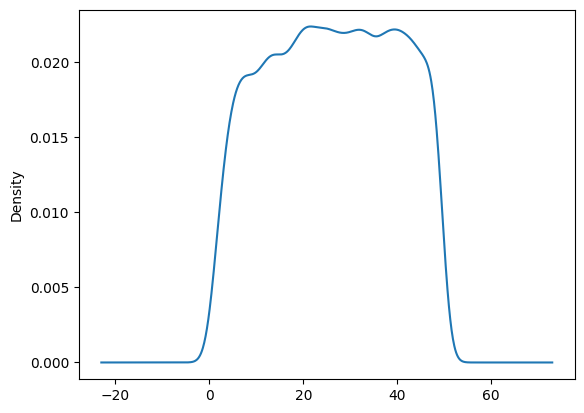

In [7]:
# From the summary of numerical columns, there seem to be outliers in days_left and price.

data['days_left'].plot.kde()

<Axes: >

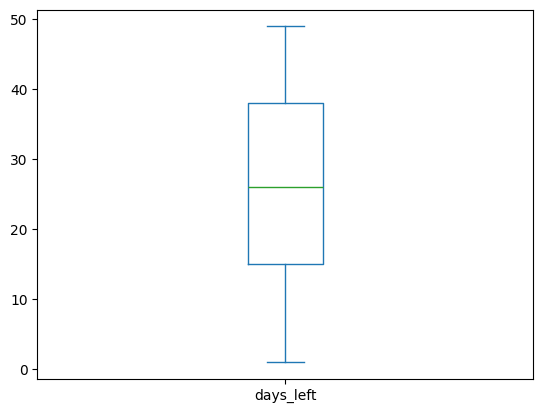

In [8]:
data['days_left'].plot.box()   # not really, this column seems clear.

<Axes: ylabel='Density'>

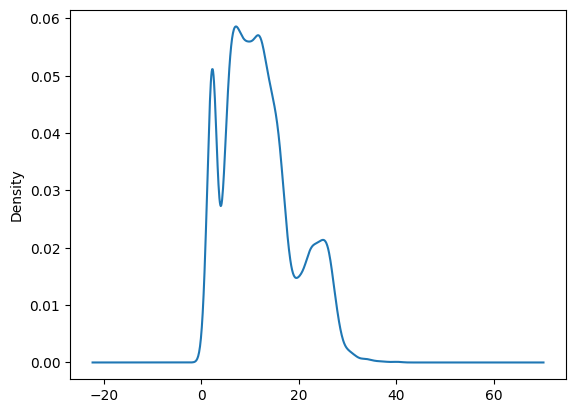

In [9]:
data['duration'].plot.kde()

<Axes: >

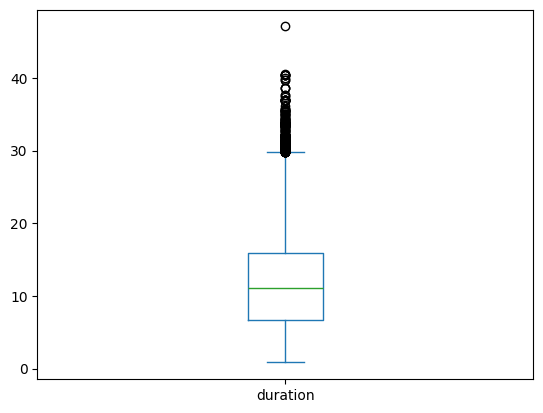

In [10]:
data['duration'].plot.box()  # there are outliers here.

<Axes: ylabel='Density'>

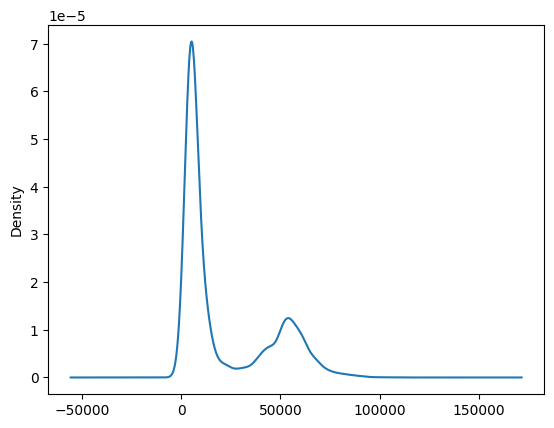

In [11]:
data['price'].plot.kde()

<Axes: >

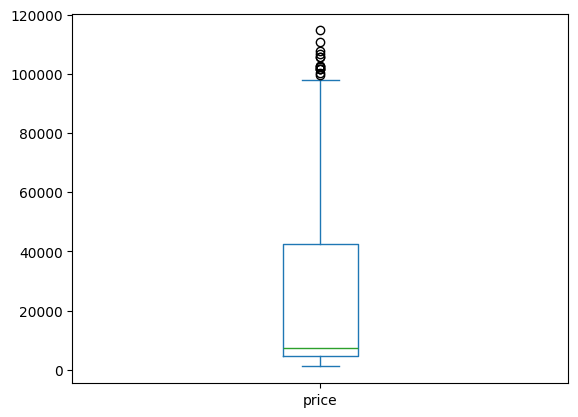

In [12]:
data['price'].plot.box()  # outliers in the target column as well. Also the data is a bit skewed to the right, so taking median might be better than mean.

# From The Visuals, we derive the following insights:
- 'days_left' column has no outliers, and is a uniform distribution in our dataset.
- 'duration' column has some outliers, and is a little positively skewed.
- 'price' columns also has outliers, and very positively skewed.

In [13]:
data[data['price']>100000]  # all flights are from Vistara airline, which is considered an expensive airline.

,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
3025,3025,Vistara,UK-996,Mumbai,Evening,one,Night,Bangalore,Business,28.17,2.0,105764
4123,4123,Vistara,UK-776,Kolkata,NaN,one,Afternoon,Delhi,Business,20.58,3.0,101780
10056,10056,Vistara,UK-910,Mumbai,Evening,NaN,Morning,Chennai,Business,16.33,7.0,100204
10688,10688,Vistara,UK-772,Kolkata,Morning,NaN,Night,Delhi,Business,11.17,17.0,101780
12077,12077,Vistara,UK-772,Kolkata,Morning,one,Evening,Hyderabad,Business,9.50,4.0,106753
13000,13000,Vistara,UK-706,Kolkata,NaN,two_or_more,Night,Mumbai,Business,10.00,4.0,110936
15928,15928,NaN,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.33,5.0,102648
20894,20894,Vistara,UK-832,Chennai,NaN,one,Night,Mumbai,Business,15.08,5.0,114704
20931,20931,Vistara,UK-836,Chennai,Morning,one,Evening,Bangalore,Business,6.25,3.0,107597
24173,24173,Vistara,UK-910,Mumbai,Evening,one,Evening,Bangalore,Business,25.25,NaN,102404


In [14]:
data['airline'].value_counts()

airline
Vistara      15063
Air_India     9222
Indigo        5236
GO_FIRST      2805
AirAsia       1958
SpiceJet      1103
Name: count, dtype: int64

In [15]:
data['flight'].str.split('-').str.get(0).value_counts()

flight
UK          17032
AI          10425
0.00E+00     5240
G8           3169
I5           2205
SG           1247
6.00E         652
0.00E          30
Name: count, dtype: int64

In [16]:
data[data['flight'].apply(lambda x: True if '0.00E' in x else False)]['airline'].value_counts()

airline
Indigo    4663
Name: count, dtype: int64

In [17]:
data.isnull().sum()/40000*100       # percent of values missing

id              0.0000
airline        11.5325
flight          0.0000
source          0.0000
departure      11.9800
stops           5.7975
arrival         0.0000
destination     0.0000
class           0.0000
duration        7.5325
days_left      11.0950
price           0.0000
dtype: float64

In [18]:
data.dropna().shape   # we can't drop all missing values as it almost halves our data.

(24112, 12)

### Instead of dropping these rows, we will try to impute them as the loss of data from dropping is too much (around 40%)
### And for outliers, we will use column transformations instead of dropping them, since we can preserve more data this way.

# Cleaning and Preprocessing

In [19]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
data = data.drop(['id'], axis=1)

In [21]:
cat_cols = ['airline', 'source', 'departure', 'stops', 'arrival','destination', 'class']
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
oe.fit(data[cat_cols])

def clean_data(data, oe, cat_cols):
    '''
    Ordinally encode the categorical columns, 
    Use KNNImputer to impute values,
    and then apply an inverse transform to bring the categorical columns to their original form.
    '''
    data_ = data.copy()
    data_['airline'] = data_['flight'].apply(
        lambda x: 'Vistara' if 'UK' in x else 'Air_India' if 'AI' in x else 'GO_FIRST' if 'G8' in x else 'AirAsia' if 'I5' in x else 'SpiceJet' if 'SG' in x else 'Indigo'
    )   # Imputing missing values by deriving from the flight code.
    data_ = data_.drop(['flight'],axis=1)
    knn = KNNImputer(n_neighbors=5)

    data_[cat_cols] = oe.transform(data_[cat_cols])
    cleaned_data = pd.DataFrame(knn.fit_transform(data_), columns=data_.columns)

    cleaned_data[cat_cols] = oe.inverse_transform(cleaned_data[cat_cols].astype(np.int32))
    return cleaned_data

In [22]:
cleaned_data = pd.concat([clean_data(data, oe, cat_cols).drop(['price'],axis=1),data.iloc[:,-1]], axis=1)

In [23]:
cleaned_data['duration']

0        15.634
1        16.080
2         2.920
3         1.500
4         4.830
          ...  
39995    21.250
39996    14.080
39997    14.330
39998    24.670
39999    14.330
Name: duration, Length: 40000, dtype: float64

In [24]:
cleaned_data.to_csv('cleaned_flights.csv', index=False)

In [25]:
X = cleaned_data.iloc[:,:-1]
y = cleaned_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=25)

In [30]:
y_transform = Pipeline([
    ('transform', FunctionTransformer(func=np.log1p,inverse_func=np.expm1))
])

duration_transformations = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson',standardize=False)),
    ('scale',StandardScaler())
])

# One Hot Encoding is essential since most regression models dont understand string values, and need to be changed into numerical values. 
preprocessing = ColumnTransformer([
    ('transformer', duration_transformations,['duration']),
    ('ohe',OneHotEncoder(drop='first', sparse_output = False),['airline','source','departure','stops','arrival','destination','class']),
    ('scale',StandardScaler(),['days_left'])
])

X_train_trans = preprocessing.fit_transform(X_train)
X_test_trans = preprocessing.transform(X_test)
log_y_train = y_transform.fit_transform(y_train)
log_y_test = y_transform.transform(y_test)

In [31]:
import pickle
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test_trans, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(log_y_test, f)

# Model Training

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [27]:
# Multiple Linear Regression
lr = LinearRegression()

alphas = np.logspace(-4, 4, 50)  # from 1e-4 to 1e4
# Lasso Regression
lasso = LassoCV(alphas=alphas, cv=5)
lasso.fit(X_train_trans,log_y_train)

# Ridge Regression
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_trans,log_y_train)

# DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = RandomizedSearchCV(DecisionTreeRegressor(max_features=1.0,random_state=25), dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=25)
dt_grid.fit(X_train_trans,log_y_train)
dt_reg = dt_grid.best_estimator_

# K-Nearest Neighbors Regression
knr_params = {
    'n_neighbors': list(range(3,31))
}

knr_grid = RandomizedSearchCV(KNeighborsRegressor(weights='distance', n_jobs=-1),knr_params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1, random_state=25)
knr_grid.fit(X_train_trans,log_y_train)
knr = knr_grid.best_estimator_

# Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gbr = RandomizedSearchCV(GradientBoostingRegressor(random_state=25), param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=25)
grid_gbr.fit(X_train_trans,log_y_train)
gbr = grid_gbr.best_estimator_

# HistGradientBoostingRegressor
hgbr_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 20],
    'l2_regularization': [0.0, 1.0, 5.0],
    'max_bins': [255],
    'early_stopping': [True]
}
hgbr_grid = RandomizedSearchCV(HistGradientBoostingRegressor(loss='squared_error', learning_rate=0.05, max_iter=300,max_depth=5, l2_regularization=1.0, early_stopping=True),hgbr_params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1, random_state=25)
hgbr_grid.fit(X_train_trans,log_y_train)
hgbr = hgbr_grid.best_estimator_

# MLP Regressor
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}
grid_mlp = RandomizedSearchCV(MLPRegressor(max_iter=1000, random_state=25, early_stopping=True), param_grid_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=25)
grid_mlp.fit(X_train_trans,log_y_train)
mlp = grid_mlp.best_estimator_


# Checking Accuracy of the models

In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

In [29]:
scoring = 'r2'

models = {
    'Linear Regression': lr,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Decision Tree Regression': dt_reg,
    'K-Nearest Neighbors Regression': knr,
    'Gradient Boosting Regression': gbr,
    'Hist Gradient Boosting Regressor': hgbr,
    'MLP Regression': mlp
}

kf = KFold(n_splits=10,shuffle=True,random_state=25)

for name, model in models.items():
    scores = cross_val_score(model, X_train_trans, log_y_train, cv=kf, scoring=scoring, n_jobs=-1)
    print(f"{name}: CV R2 = {np.mean(scores):.4f}")

Linear Regression: CV R2 = 0.9189
Ridge Regression: CV R2 = 0.9189
Lasso Regression: CV R2 = 0.9188
Decision Tree Regression: CV R2 = 0.9551
K-Nearest Neighbors Regression: CV R2 = 0.9193
Gradient Boosting Regression: CV R2 = 0.9657
Hist Gradient Boosting Regressor: CV R2 = 0.9675
MLP Regression: CV R2 = 0.9606


In [30]:
print(r2_score(y_true=log_y_test,y_pred=gbr.predict(X_test_trans)))
print(r2_score(y_true=log_y_test,y_pred=hgbr.predict(X_test_trans)))

0.9634006113679372
0.9646030070107834


### Since Hist Gradient Boosting Regressor performs the best, we will export it for our website.

In [32]:
with open('flight_model.pkl', 'wb') as model:
    pickle.dump(hgbr, model)
with open('flight_pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessing, f)
with open('flight_y_pipeline.pkl', 'wb') as f:
    pickle.dump(y_transform, f)